### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import warnings
from pingouin import qqplot

warnings.filterwarnings("ignore")

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Dataset Understanding

In [3]:
df.ndim

2

In [4]:
df.shape

(891, 15)

In [5]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Handing Missing Values

**Checking for missing values**

In [8]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**Visualization of missing values**

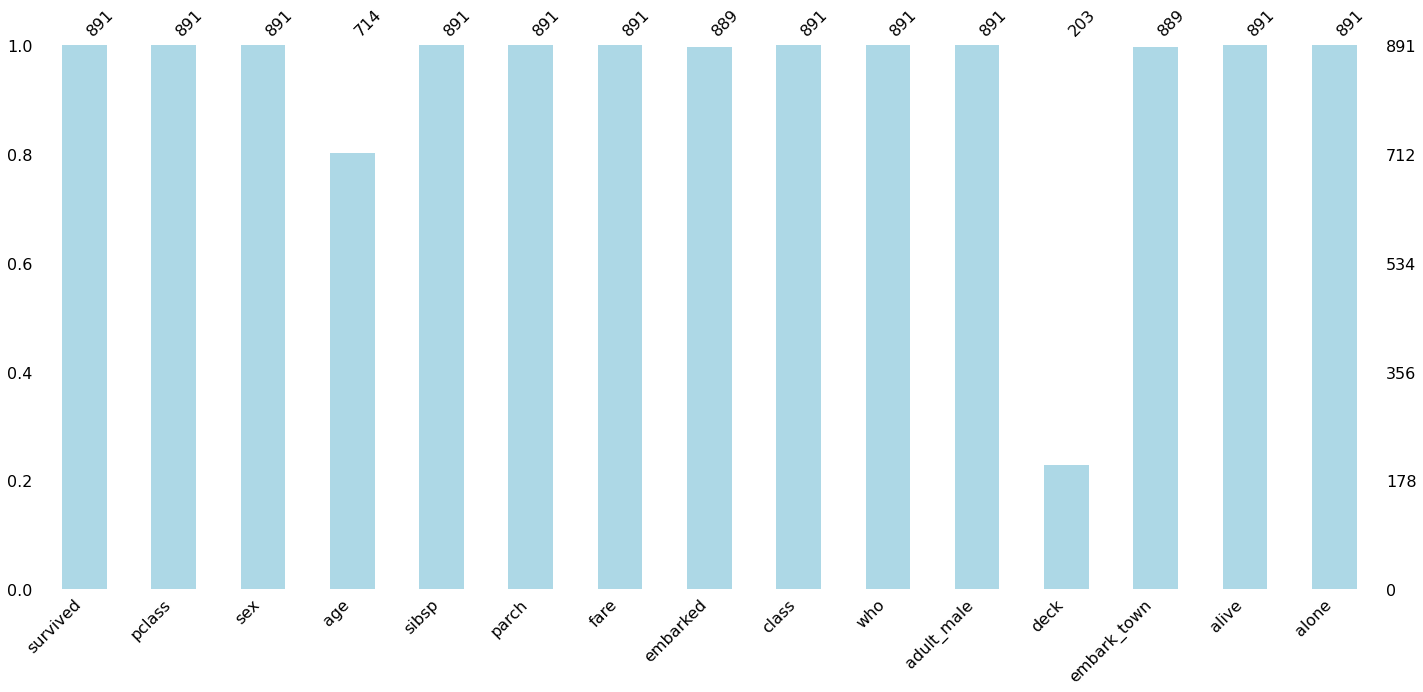

In [9]:
import missingno as msno

msno.bar(df, color="lightblue")
plt.show()

**Filling NaN values in age column by median value**

In [10]:
df["age"].fillna(df.age.median(), inplace=True)
df.age.isna().any()

False

**Filling NaN values in deck column by Random value choices**

In [11]:
np.random.seed(42)
df["deck"].fillna(np.random.choice(["C", "E", "G", "D", "A", "B", "F"]), inplace=True)
df.deck.isna().any()

False

**Dropping NaN values in embark_town and embarked columns**

In [12]:
df.dropna(inplace=True)

**Re-checking for Missing values**

In [13]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

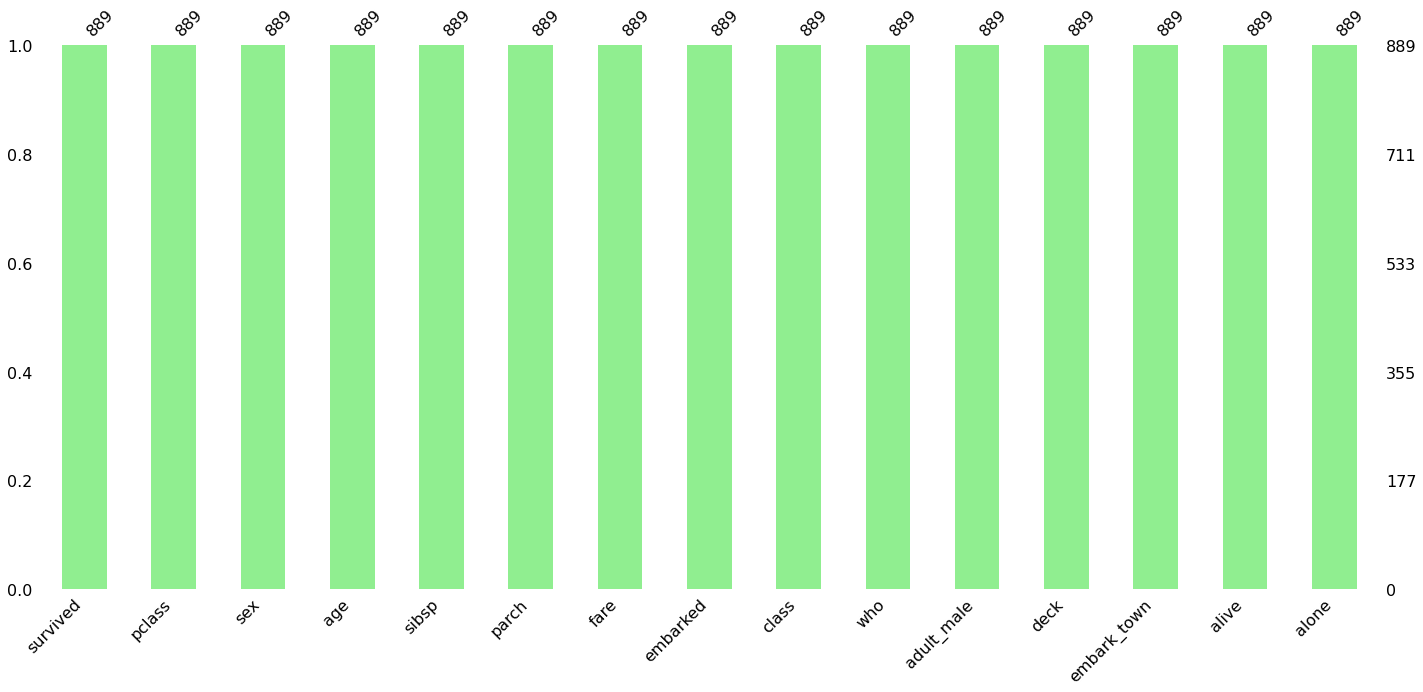

In [14]:
msno.bar(df, color="lightgreen")
plt.show()

**Value Counts for Categorical columns**

In [15]:
df["survived"] = df.survived.map({0: "Not Survived", 1: "Survived"})

In [16]:
df.survived.value_counts()

Not Survived    549
Survived        340
Name: survived, dtype: int64

In [17]:
df.sex.value_counts()

male      577
female    312
Name: sex, dtype: int64

In [18]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [19]:
df["class"].value_counts()

Third     491
First     214
Second    184
Name: class, dtype: int64

In [20]:
df.who.value_counts()

man      537
woman    269
child     83
Name: who, dtype: int64

In [21]:
df.adult_male.value_counts()

True     537
False    352
Name: adult_male, dtype: int64

In [22]:
df.deck.value_counts()

F    701
C     59
B     45
D     33
E     32
A     15
G      4
Name: deck, dtype: int64

In [23]:
df.alone.value_counts()

True     535
False    354
Name: alone, dtype: int64

In [24]:
df.alive.value_counts()

no     549
yes    340
Name: alive, dtype: int64

**Group by survived**

In [25]:
df.groupby("survived").mean()

,pclass,age,sibsp,parch,fare,adult_male,alone
survived,,,,,,,
Not Survived,2.531876,30.028233,0.553734,0.329690,22.117887,0.817851,0.681239
Survived,1.955882,28.163735,0.476471,0.467647,48.209498,0.258824,0.473529


In [26]:
df.groupby("survived").var()

,pclass,age,sibsp,parch,fare,adult_male,alone
survived,,,,,,,
Not Survived,0.541409,156.249658,1.659972,0.677602,985.219509,0.149243,0.217549
Survived,0.744361,186.930942,0.503870,0.597770,4455.398709,0.192400,0.250035


In [27]:
df.groupby("survived").std()

,pclass,age,sibsp,parch,fare,adult_male,alone
survived,,,,,,,
Not Survived,0.735805,12.499986,1.288399,0.823166,31.388207,0.386320,0.466421
Survived,0.862763,13.672269,0.709838,0.773156,66.748773,0.438634,0.500035


In [28]:
df.describe()

,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualization

In [29]:
def plot_numerical(var):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    sns.histplot(x=df[var], ax=axes[0][0], kde=True, bins=20)
    qqplot(df[var], dist="norm", ax=axes[0][1])
    sns.stripplot(x=df.survived, y=df[var], ax=axes[1][0], palette="tab10")
    sns.barplot(x=df.survived, y=df[var], ax=axes[1][1], palette="bright")
    plt.suptitle(var.title())
    plt.show()

In [30]:
def plot_kde(var):
    facet = sns.FacetGrid(df, hue="survived", aspect=4, palette="tab10")
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
    plt.title(var.title())
    plt.show()

In [31]:
def plot_categorial(var):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    df[var].value_counts().plot.pie(
        autopct="%.0f%%",
        labels=df[var].unique(),
        shadow=True,
        startangle=180,
        ax=ax[0][0],
    )

    df[var].value_counts().plot.barh(ax=ax[0][1])
    sns.scatterplot(x=df.fare, y=df.age, hue=df[var], ax=ax[1][0], palette="tab10")
    sns.stripplot(x=df[var], y=df.fare, hue=df.survived, ax=ax[1][1], palette="bright")
    fig.suptitle("Count of " + var.title())
    plt.show()

In [32]:
numerical_columns = ["age", "fare", "sibsp", "parch"]

In [33]:
categorical_columns = [
    "survived",
    "pclass",
    "sex",
    "embarked",
    "class",
    "who",
    "adult_male",
    "embark_town",
    "alive",
    "alone",
]

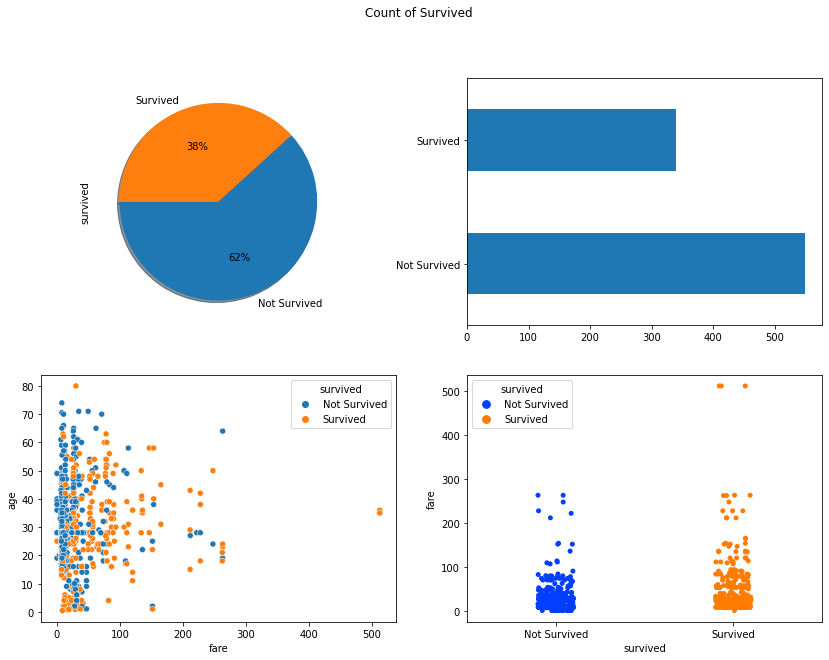

In [34]:
plot_categorial(categorical_columns[0])

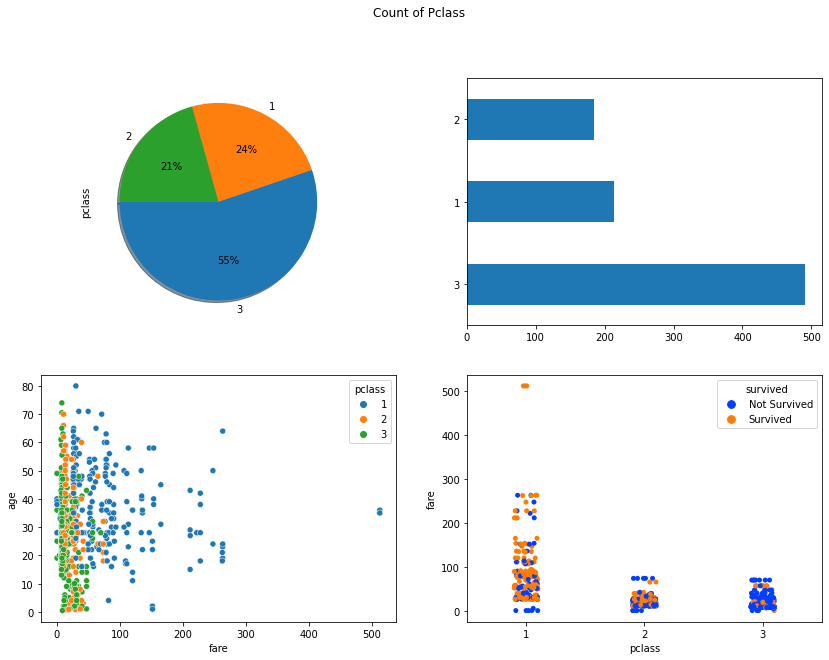

In [35]:
plot_categorial(categorical_columns[1])

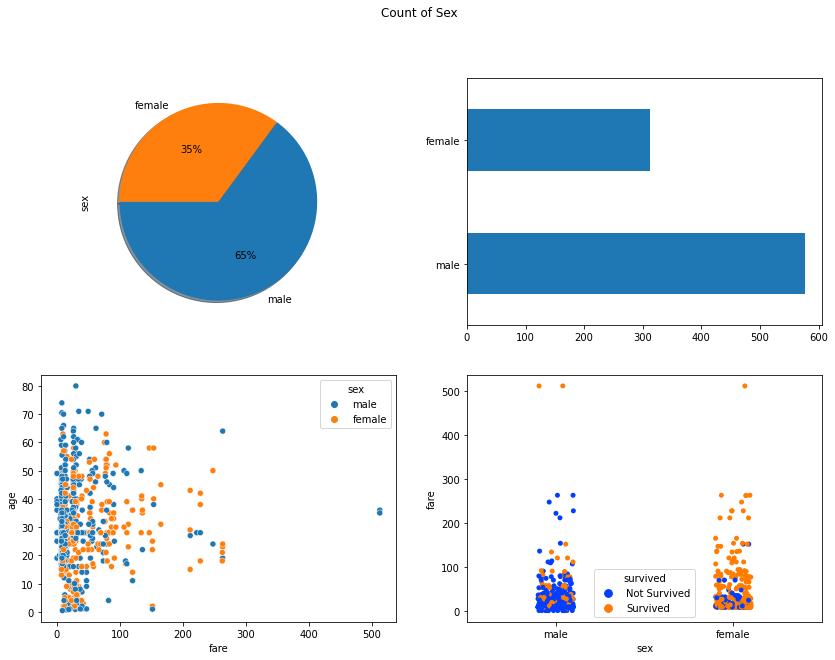

In [36]:
plot_categorial(categorical_columns[2])

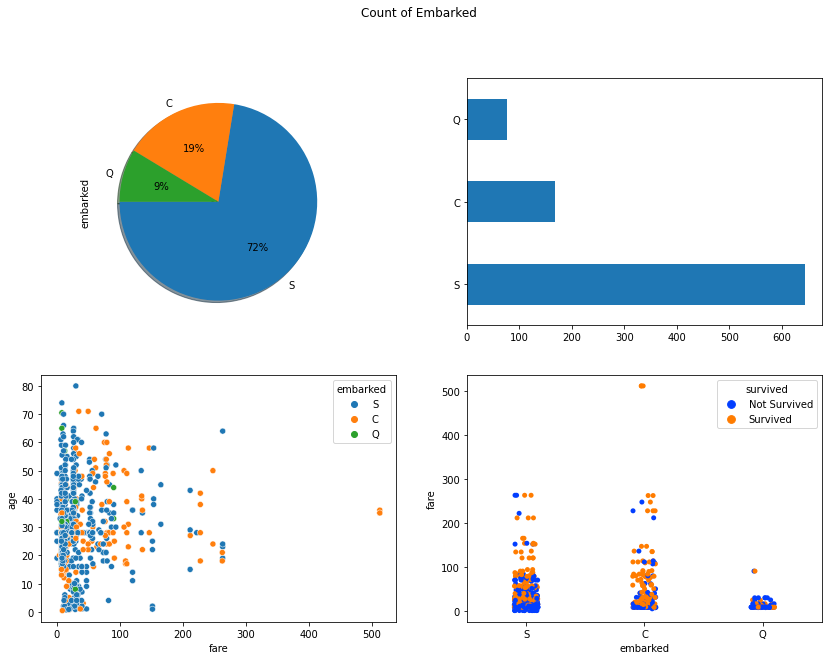

In [37]:
plot_categorial(categorical_columns[3])

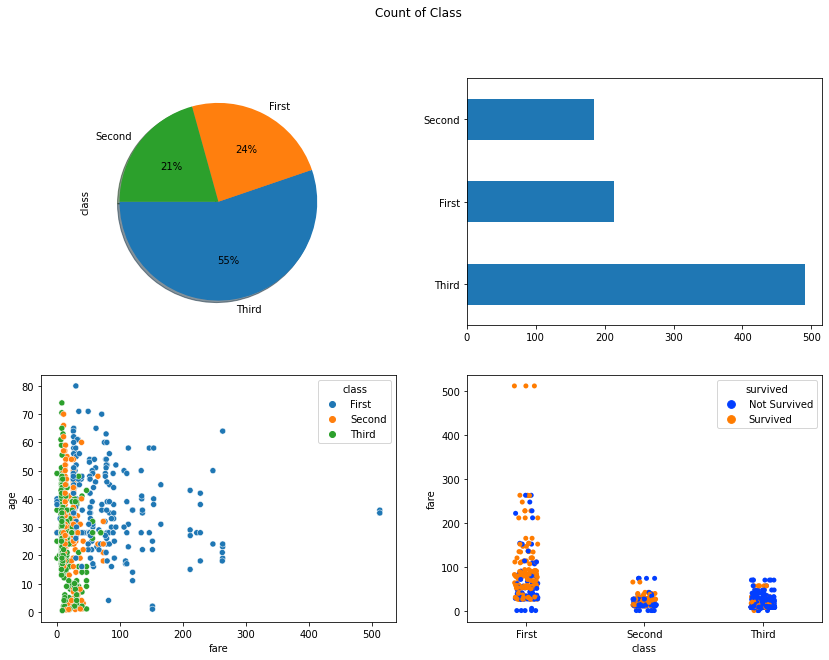

In [38]:
plot_categorial(categorical_columns[4])

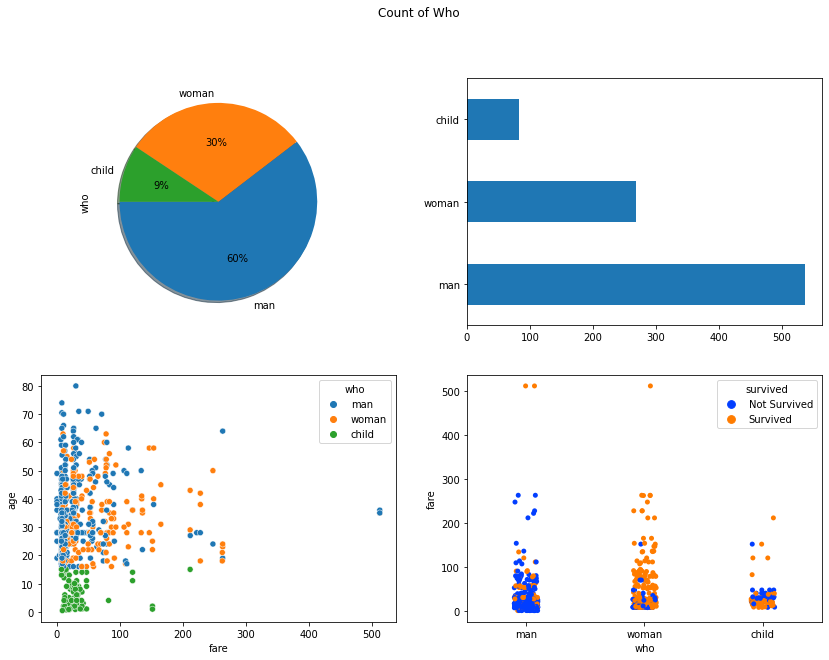

In [39]:
plot_categorial(categorical_columns[5])

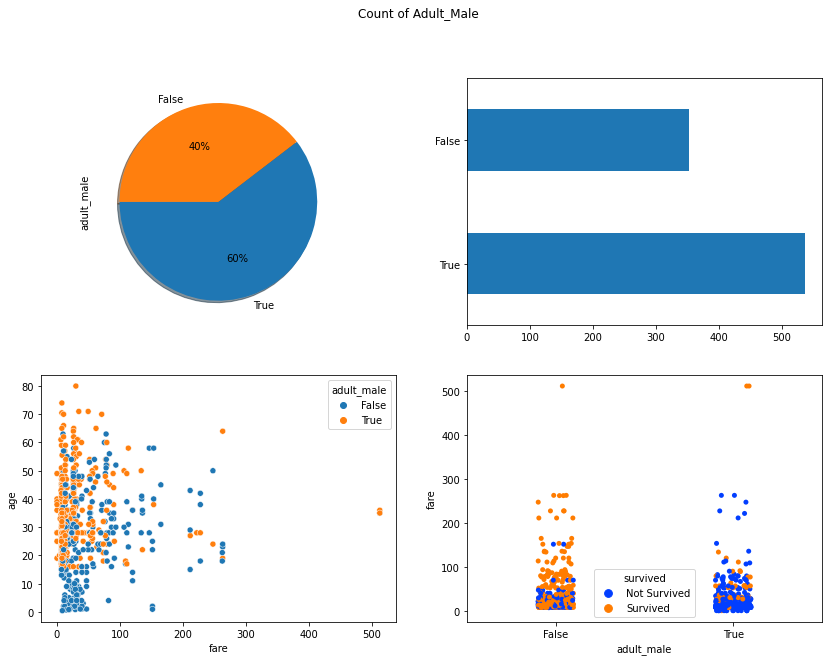

In [40]:
plot_categorial(categorical_columns[6])

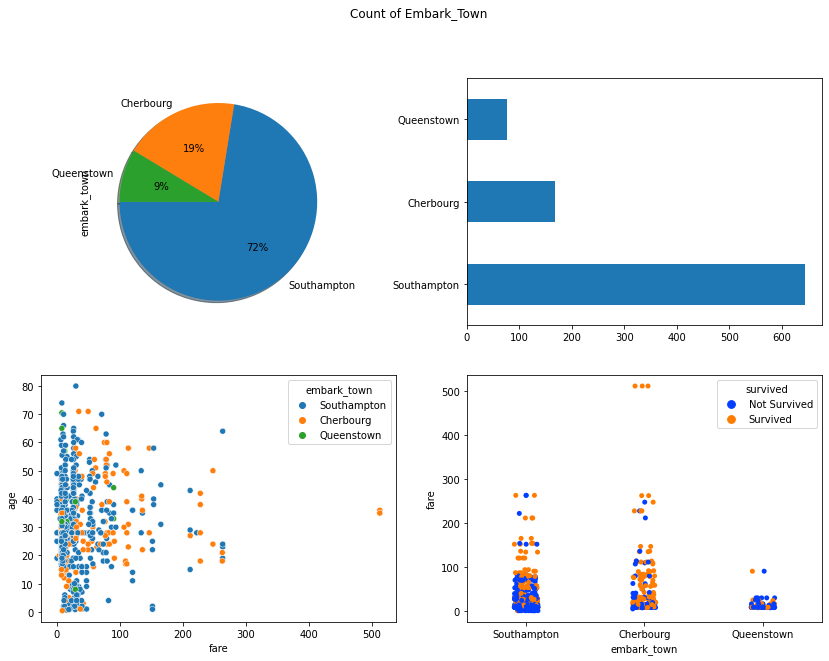

In [41]:
plot_categorial(categorical_columns[7])

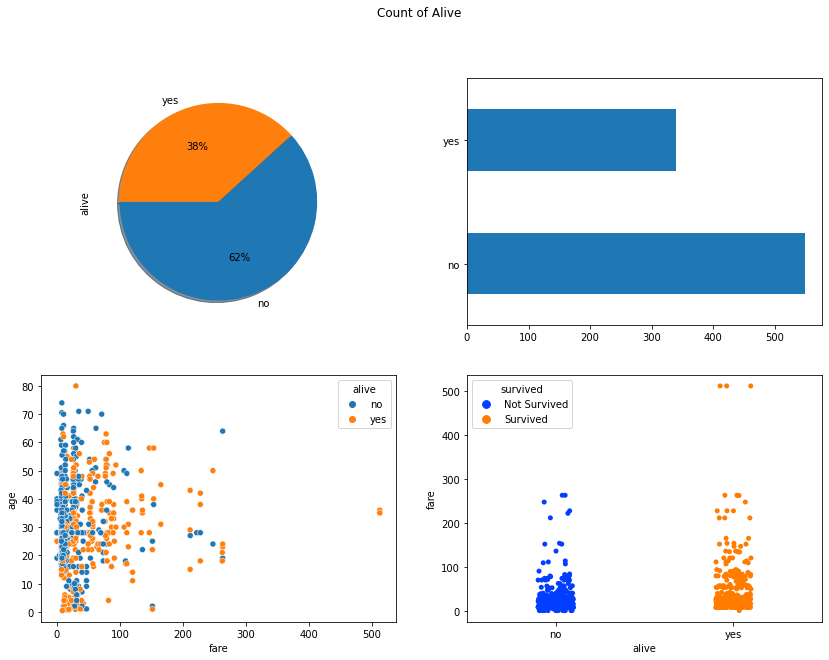

In [42]:
plot_categorial(categorical_columns[8])

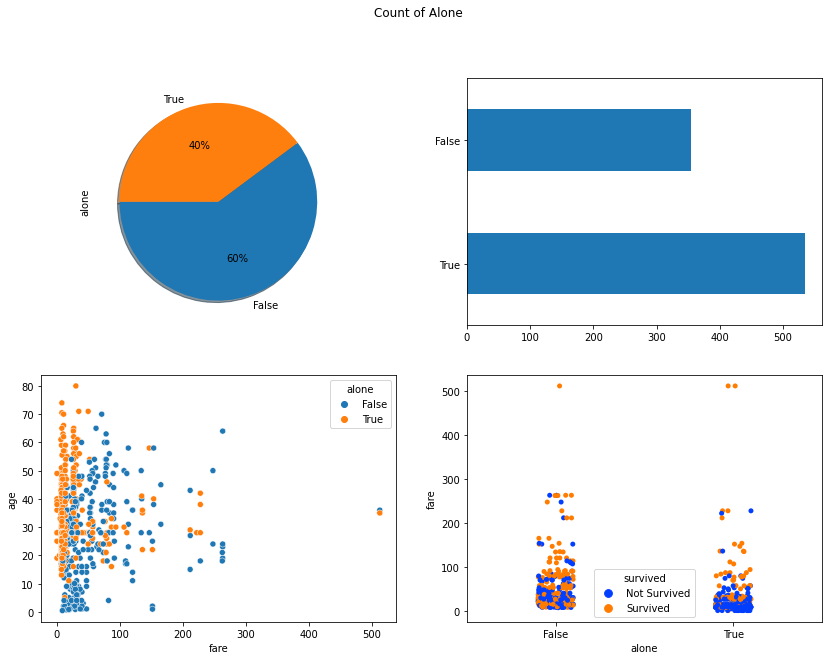

In [43]:
plot_categorial(categorical_columns[9])

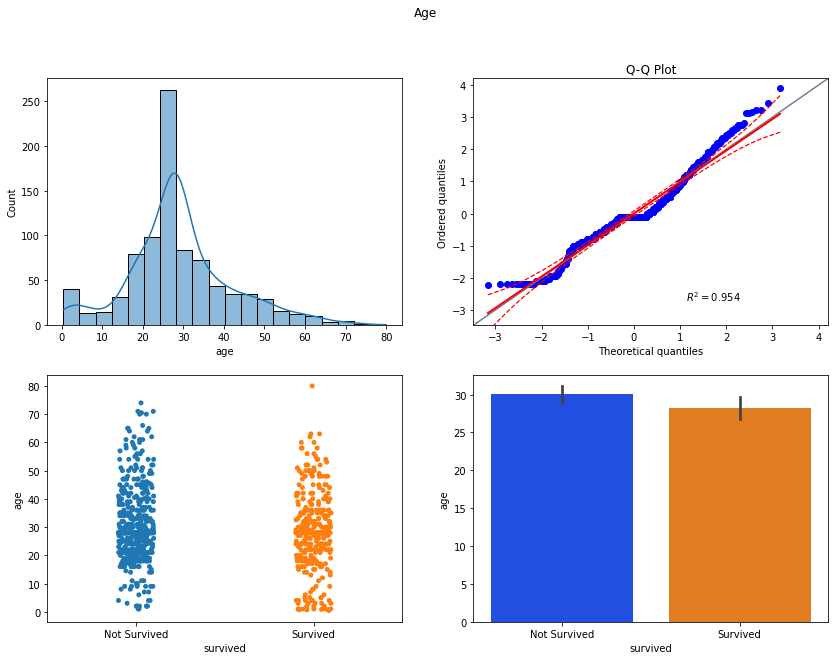

In [44]:
plot_numerical(numerical_columns[0])

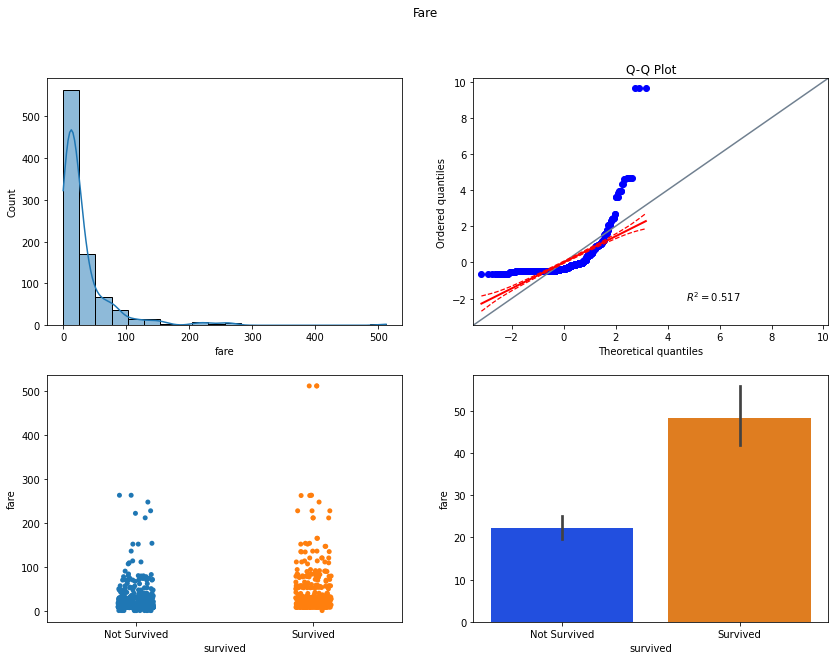

In [45]:
plot_numerical(numerical_columns[1])

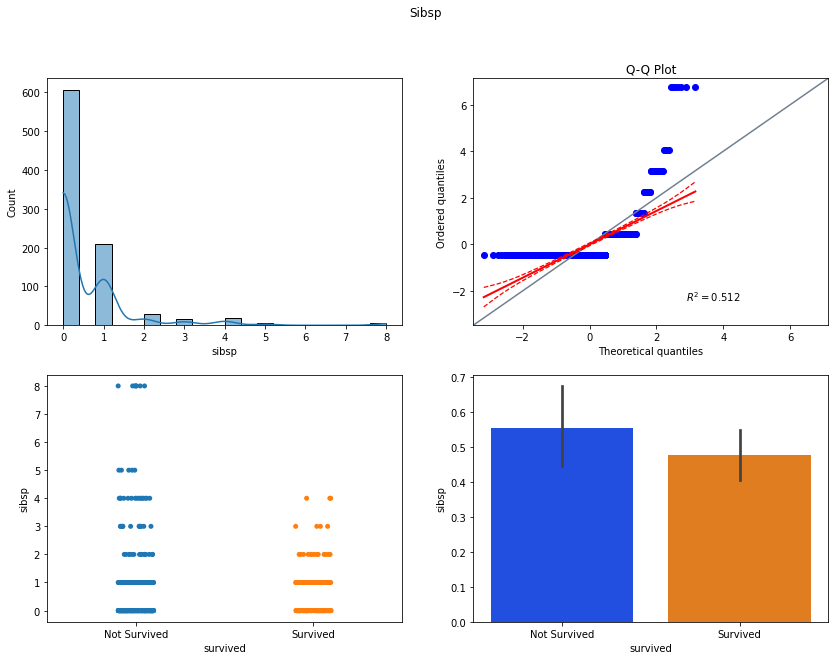

In [46]:
plot_numerical(numerical_columns[2])

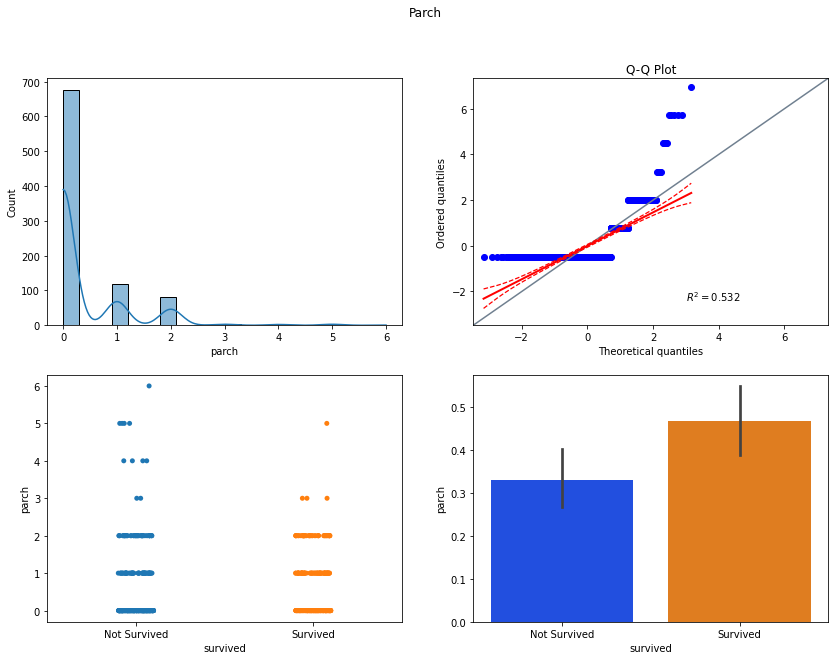

In [47]:
plot_numerical(numerical_columns[3])

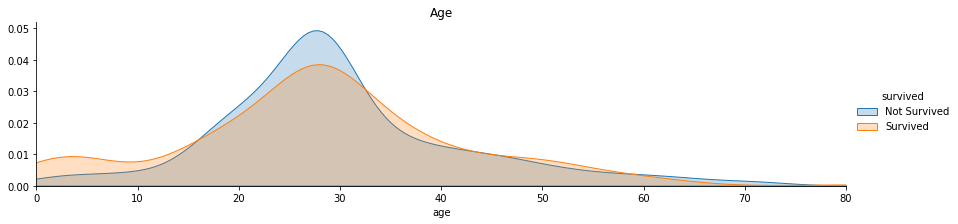

In [50]:
plot_kde(numerical_columns[0])

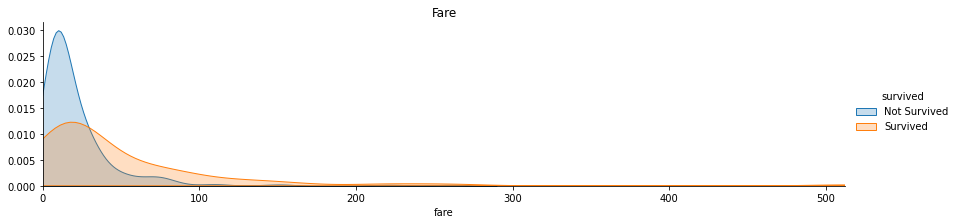

In [51]:
plot_kde(numerical_columns[1])

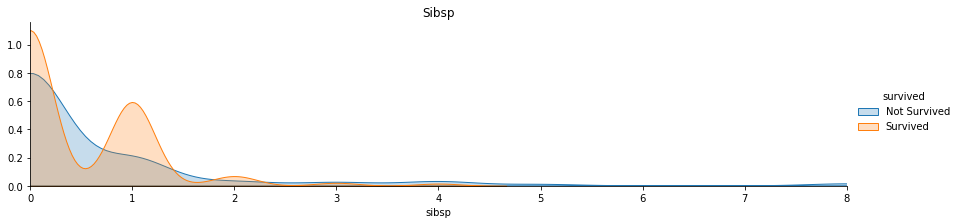

In [53]:
plot_kde(numerical_columns[2])

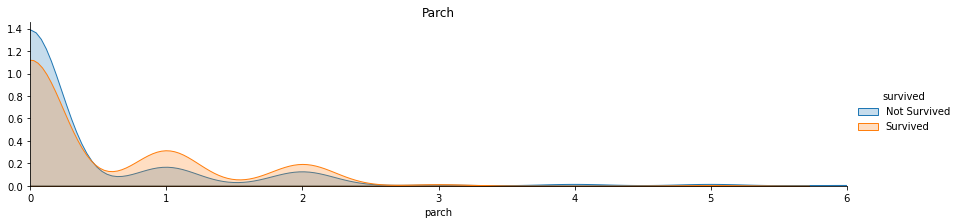

In [54]:
plot_kde(numerical_columns[3])

In [56]:
df["survived"] = df.survived.map({"Not Survived": 0, "Survived": 1})

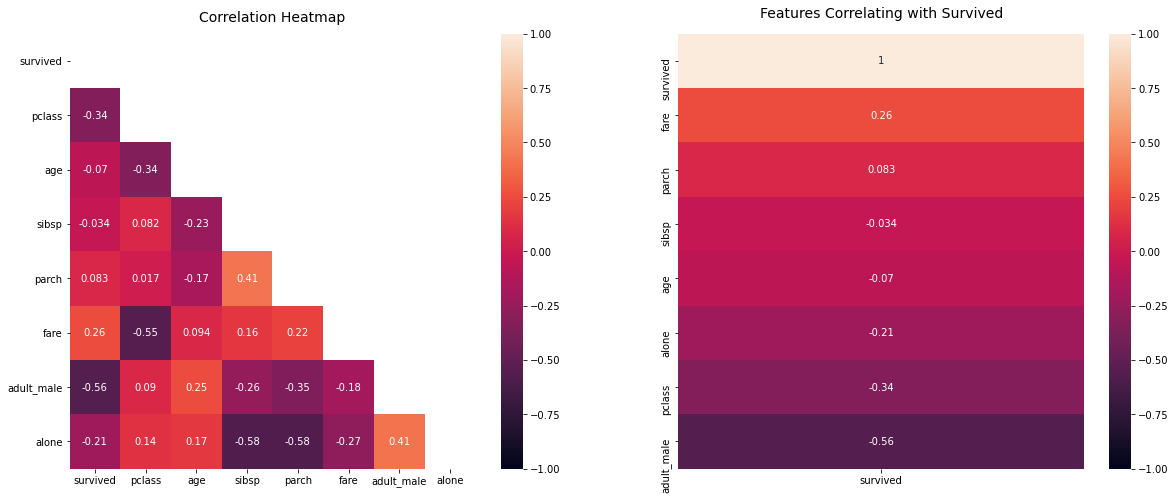

In [57]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0])
cat_heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 14}, pad=12)

heatmap = sns.heatmap(
    resign_corr[["survived"]].sort_values(by="survived", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
)
heatmap.set_title(
    "Features Correlating with Survived", fontdict={"fontsize": 14}, pad=16
)
plt.show()

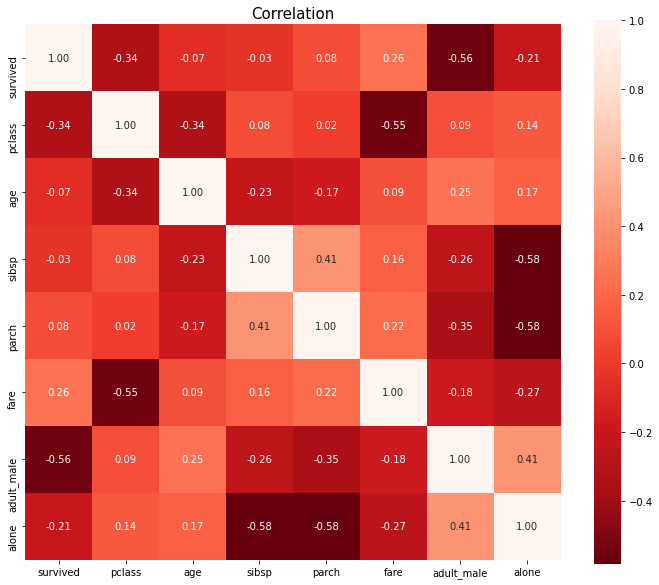

In [58]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", square=True, cmap="Reds_r")
plt.title("Correlation", size=15)
plt.show()

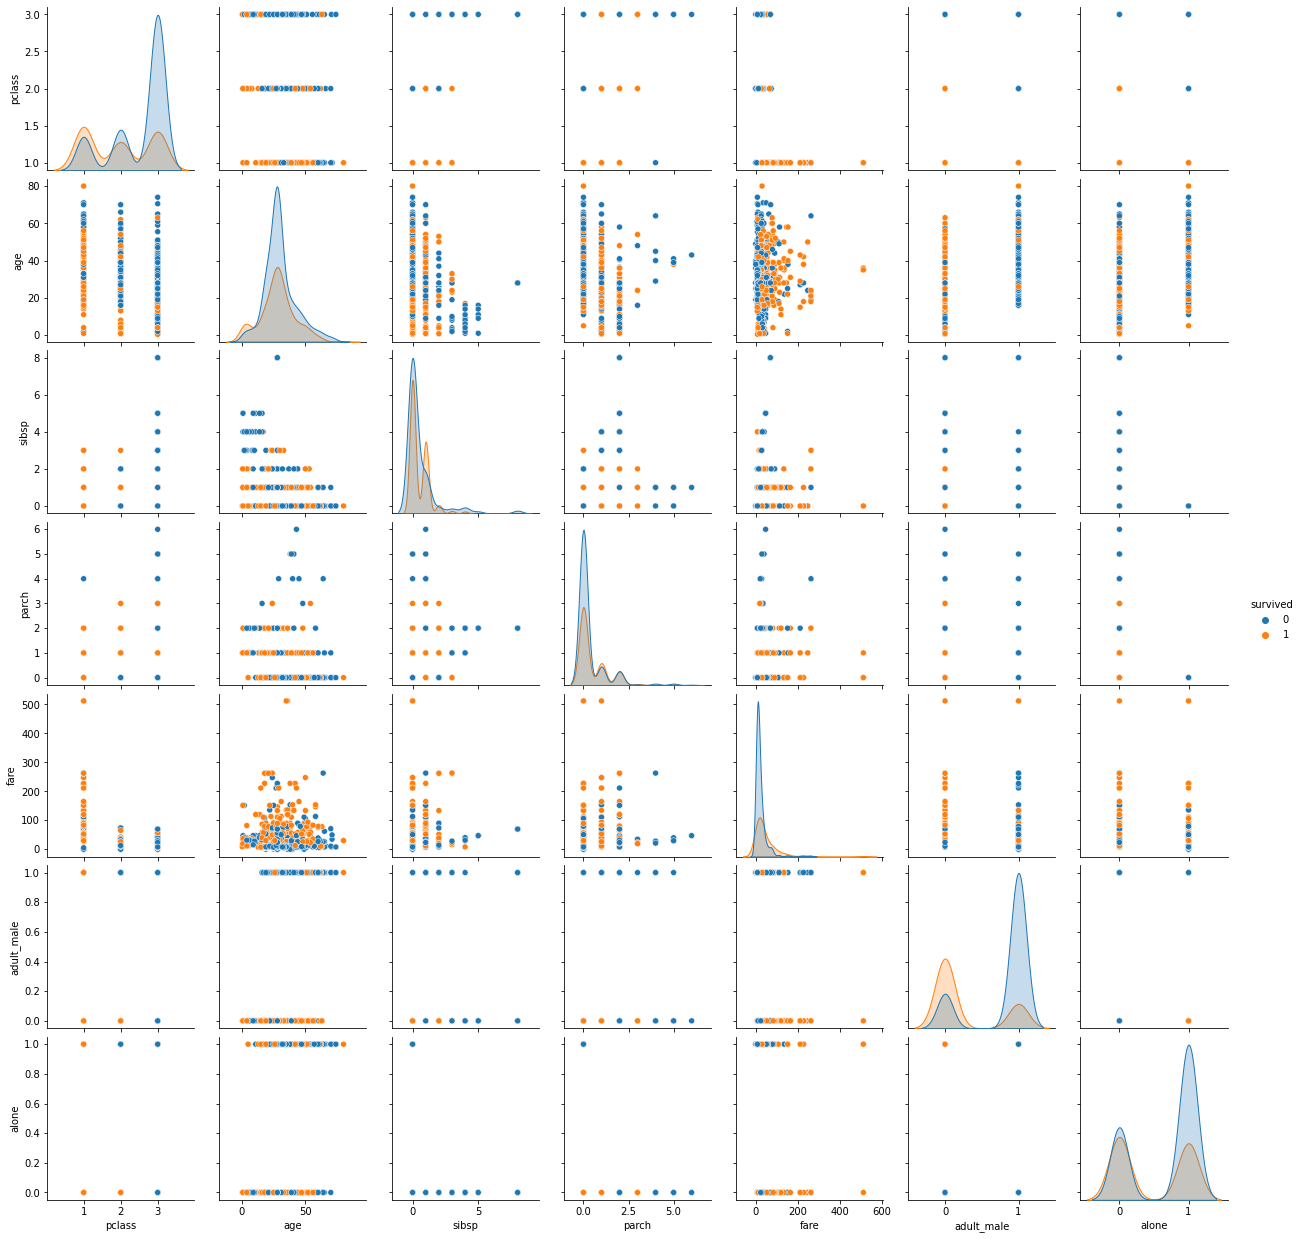

In [61]:
sns.pairplot(df, hue="survived")
plt.show()